In [1]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('train.csv')
df.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [3]:
df.shape

(15819, 3)

In [4]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\u1121\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\u1121\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


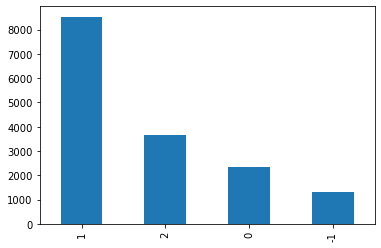

In [5]:
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

#### Text Cleaning

In [6]:
#remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

df.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late url-web url-web…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change url-web,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [7]:
# Lower case

df['message'] = df['message'].str.lower()
df.head()

,sentiment,message,tweetid
0,1,"polyscimajor epa chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? url-web via @mashable",625221
1,1,it's not like we lack evidence of anthropogenic global warming,126103
2,2,rt @rawstory: researchers say we have three years to act on climate change before it’s too late url-web url-web…,698562
3,1,#todayinmaker# wired : 2016 was a pivotal year in the war on climate change url-web,573736
4,1,"rt @soynoviodetodas: it's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #electionnight",466954


In [8]:
#remove punctuation
import string
def remove_punctuation(message):
    return ''.join([l for l in message if l not in string.punctuation])

df['message'] = df['message'].apply(remove_punctuation)
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via mashable,625221
1,1,its not like we lack evidence of anthropogenic global warming,126103
2,2,rt rawstory researchers say we have three years to act on climate change before it’s too late urlweb urlweb…,698562
3,1,todayinmaker wired 2016 was a pivotal year in the war on climate change urlweb,573736
4,1,rt soynoviodetodas its 2016 and a racist sexist climate change denying bigot is leading in the polls electionnight,466954


Feature Extraction using CountVectorizer

In [9]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# create vectorizer object
vect = CountVectorizer()

#fit vectorizer
vect.fit(df['message'])

CountVectorizer()

In [11]:
# length of predictors
print(len(vect.vocabulary_))

24819


In [12]:
#predictor names
vect.get_feature_names()

['000005',
 '004',
 '009barca',
 '00kevin7',
 '010536',
 '012',
 '02',
 '020',
 '02cents0',
 '0324',
 '0519am',
 '07',
 '08',
 '094',
 '0bama',
 '0bamas',
 '0c',
 '0x526978',
 '10',
 '100',
 '1000',
 '100000',
 '100000250000',
 '10000yr',
 '1000s',
 '1001',
 '100daysofshame',
 '100h',
 '100isnow',
 '100pmin',
 '100s',
 '100th',
 '100x',
 '100yearold',
 '101',
 '1010',
 '1015',
 '1030',
 '105',
 '106',
 '10950',
 '109c',
 '10bucks',
 '10c',
 '10gasflaring',
 '10most',
 '10th',
 '10yrs',
 '10ã',
 '11',
 '110',
 '1100',
 '1110c',
 '1111',
 '112',
 '1123',
 '1130',
 '114',
 '1140',
 '115',
 '11500',
 '11pm',
 '11th',
 '11yearold',
 '12',
 '1200',
 '120k',
 '1224',
 '1234',
 '125',
 '127150',
 '12am',
 '12balboa',
 '12th',
 '13',
 '130',
 '1306chomley',
 '131',
 '13690',
 '139',
 '14',
 '140',
 '1400',
 '140b',
 '140p',
 '1430',
 '1431',
 '145',
 '1459',
 '1464',
 '146th',
 '1488ã',
 '14babyken',
 '15',
 '150',
 '15000',
 '150000',
 '15c',
 '15degree',
 '15mm',
 '15th',
 '15yearold',
 '15ã'

We can seee that not all the predictors are very useful. Must Tune vectorizer.

In [14]:
betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))

betterVect.fit(df['message'])

CountVectorizer(max_df=0.5, min_df=2, stop_words='english')

In [15]:
#predictor names
betterVect.get_feature_names()

['10',
 '100',
 '1000',
 '100000',
 '1000s',
 '100s',
 '101',
 '105',
 '109c',
 '10yrs',
 '11',
 '110',
 '115',
 '11500',
 '12',
 '125',
 '13',
 '14',
 '140',
 '145',
 '15',
 '150',
 '15c',
 '15th',
 '15ã',
 '16',
 '17',
 '170',
 '175',
 '18',
 '19',
 '190',
 '1912',
 '195',
 '1957',
 '1963',
 '1968',
 '1970s',
 '1990',
 '1990s',
 '1991',
 '1998',
 '1b',
 '1billion',
 '1bn',
 '1followernodad',
 '1o5c',
 '1st',
 '1starfleetcadet',
 '20',
 '200',
 '2000',
 '200000',
 '2006',
 '2008',
 '2009',
 '200millionyearold',
 '200yrold',
 '2010',
 '20102017',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2016s',
 '2017',
 '2018',
 '2019',
 '202',
 '2020',
 '2022243121',
 '2030',
 '2045',
 '2050',
 '21',
 '2100',
 '21cf',
 '21logician',
 '21st',
 '22',
 '22000000000',
 '225',
 '23',
 '2322',
 '24',
 '247',
 '24hoursofreality',
 '25',
 '250ã',
 '25th',
 '26',
 '27',
 '28',
 '280',
 '29',
 '2c',
 '2day',
 '2nd',
 '30',
 '300',
 '3000',
 '300000',
 '32',
 '320',
 '3200',
 '320000',
 '33',
 '3

In [16]:
# length of predictors
print(len(betterVect.vocabulary_))

9008


In [14]:
#transform message to usable vextor for modelling
message_vectorized=vect.transform(df['message'])

print(message_vectorized)

  (0, 1526)	1
  (0, 3734)	1
  (0, 3884)	1
  (0, 4300)	1
  (0, 6482)	1
  (0, 6743)	1
  (0, 7666)	1
  (0, 9393)	1
  (0, 11507)	1
  (0, 13652)	1
  (0, 13943)	1
  (0, 15842)	1
  (0, 17115)	1
  (0, 22075)	1
  (0, 23209)	1
  (0, 23416)	1
  (0, 23614)	1
  (0, 23682)	1
  (0, 23964)	1
  (1, 1689)	1
  (1, 7883)	1
  (1, 9393)	1
  (1, 11588)	1
  (1, 12729)	1
  (1, 13193)	1
  :	:
  (15817, 2617)	1
  (15817, 3565)	1
  (15817, 4076)	1
  (15817, 4091)	1
  (15817, 4586)	2
  (15817, 5452)	1
  (15817, 10341)	1
  (15817, 10464)	1
  (15817, 11507)	2
  (15817, 13139)	1
  (15817, 19055)	1
  (15817, 19312)	1
  (15817, 21836)	1
  (15817, 21850)	2
  (15817, 22198)	1
  (15817, 22276)	1
  (15818, 4076)	1
  (15818, 4286)	1
  (15818, 4586)	1
  (15818, 7695)	1
  (15818, 11054)	1
  (15818, 12694)	1
  (15818, 19055)	1
  (15818, 19595)	1
  (15818, 23209)	1


Training

In [15]:
# split predictors and response
y=df['sentiment']
X=message_vectorized

In [16]:
# import train/test split module
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(message_vectorized, y, test_size=0.2, random_state=50)

In [17]:
# import logistic regression module
from sklearn.linear_model import LogisticRegression

# create model object
lr = LogisticRegression()

# train model
lr.fit(X_train, y_train)

LogisticRegression()